In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree

plt.style.use('dark_background')

In [16]:
X, y = load_breast_cancer(return_X_y=True)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [18]:
def gb_predict(X, trees_list, eta):
    predictions = np.zeros(X.shape[0])

    for i, x in enumerate(X):
        prediction = 0

        for alg in trees_list:
            prediction += eta * alg.predict([x])[0]

        predictions[i] = prediction

    #predictions = np.array([sum([eta * alg.predict([x])[0] for alg in trees_list]) for x in X])

    return predictions

In [19]:
def mean_square_error(y, predicted):
    return np.mean((y - predicted)**2)

In [20]:
# L2' loss
def residual(y, z):
    return - (z - y)

In [21]:
def gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, eta):
    trees = []
    train_errors = []
    test_errors = []

    for i in range(n_trees):
        tree = DecisionTreeRegressor(max_depth=max_depth, random_state=42)

        if len(trees) == 0:
            tree.fit(X_train, y_train)

            tr_error = mean_square_error(y_train, gb_predict(X_train, trees, eta))
            train_errors.append(tr_error)

            ts_error = mean_square_error(y_test, gb_predict(X_test, trees, eta))
            test_errors.append(ts_error)

        else:
            target = gb_predict(X_train, trees, eta)

            tree.fit(X_train, residual(y_train, target))

            tr_error = mean_square_error(y_train, gb_predict(X_train, trees, eta))
            train_errors.append(tr_error)

            ts_error = mean_square_error(y_test, gb_predict(X_test, trees, eta))
            test_errors.append(ts_error)

        trees.append(tree)

    return trees, train_errors, test_errors

In [22]:
# build graph error/number_of_trees
def get_error_plot(n_trees, train_error, test_error):
    plt.xlabel('Number of trees')
    plt.ylabel('MSE')
    plt.xlim(0, n_trees)
    plt.plot(list(range(n_trees)), train_error, label='train error')
    plt.plot(list(range(n_trees)), test_error, label='test error')
    plt.legend(loc='upper right')
    plt.show()

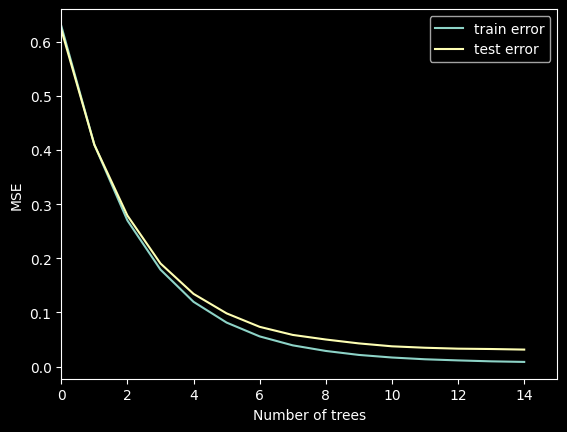

In [23]:
# Examples error/n_trees
max_depth = 3
n_trees = 15
eta = 0.2
trees, train_errors, test_errors = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, eta)
get_error_plot(n_trees, train_errors, test_errors)

In [24]:
# build graph error/max_depth
def get_error_plot_depth(arr_depth, train_error, test_error):
    plt.xlabel('depth')
    plt.ylabel('error')
    plt.xlim(0, n_trees)
    plt.plot(arr_depth, train_error, label='train error')
    plt.plot(arr_depth, test_error, label='test error')
    plt.legend(loc='upper right')
    plt.show()

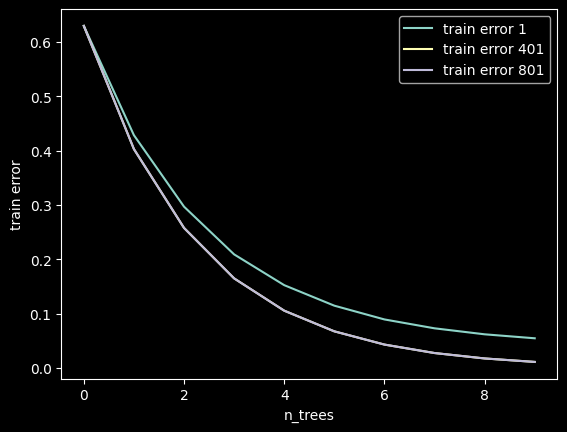

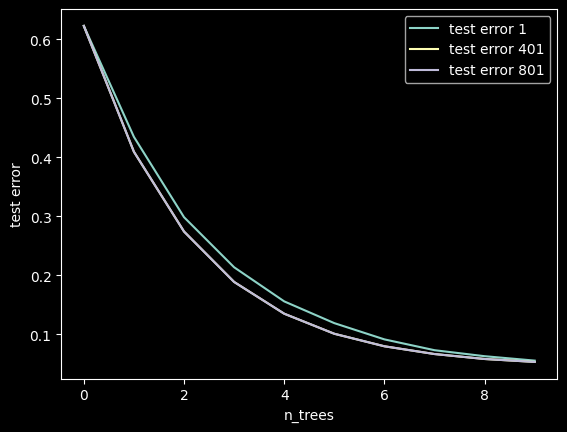

In [25]:
# Examples error/max_depth
max_depth_arr = list(range(1, 802, 400))
n_trees = 10
eta = 0.2

for i in max_depth_arr:
    _, train_error, test_error = gb_fit(n_trees, i, X_train, X_test, y_train, y_test, eta)
    plt.plot(list(range(n_trees)), train_error, label=f'train error {i}')
plt.xlabel('n_trees')
plt.ylabel('train error')
plt.legend(loc='upper right')
plt.show()

for i in max_depth_arr:
    _, train_error, test_error = gb_fit(n_trees, i, X_train, X_test, y_train, y_test, eta)
    plt.plot(list(range(n_trees)), test_error, label=f'test error {i}')
plt.xlabel('n_trees')
plt.ylabel('test error')
plt.legend(loc='upper right')
plt.show()

In [26]:
def stochastic_gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, eta, coef_stoch=0.5):
    trees = []
    train_errors = []
    test_errors = []

    for i in range(n_trees):
        # random select e.g. 50% samples, every iter
        indexes = np.random.choice(X_train.shape[0], size=int(X_train.shape[0] * coef_stoch), replace=False)
        X_train_stoch = X_train[indexes]
        y_train_stoch = y_train[indexes]

        tree = DecisionTreeRegressor(max_depth=max_depth, random_state=42)

        if len(trees) == 0:
            tree.fit(X_train_stoch, y_train_stoch)

            tr_error = mean_square_error(y_train_stoch, gb_predict(X_train_stoch, trees, eta))
            train_errors.append(tr_error)

            ts_error = mean_square_error(y_test, gb_predict(X_test, trees, eta))
            test_errors.append(ts_error)

        else:
            target = gb_predict(X_train_stoch, trees, eta)

            tree.fit(X_train_stoch, residual(y_train_stoch, target))

            tr_error = mean_square_error(y_train_stoch, gb_predict(X_train_stoch, trees, eta))
            train_errors.append(tr_error)

            ts_error = mean_square_error(y_test, gb_predict(X_test, trees, eta))
            test_errors.append(ts_error)

        trees.append(tree)

    return trees, train_errors, test_errors

In [27]:
# Examples error/n_trees
max_depth = 3
n_trees = 15
eta = 0.2
trees, train_errors, test_errors = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, eta)
trees, stoch_train_errors, stoch_test_errors = stochastic_gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, eta, coef_stoch=0.5)

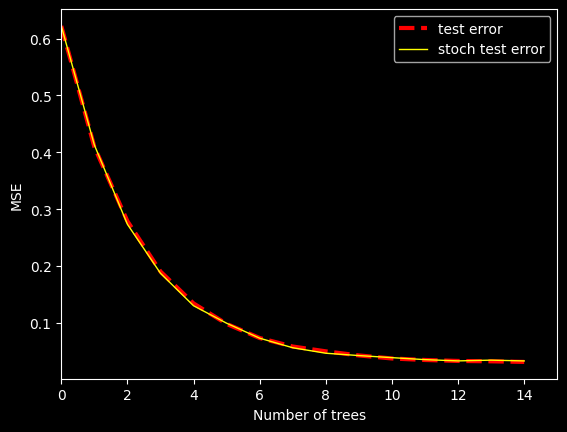

In [28]:
plt.xlabel('Number of trees')
plt.ylabel('MSE')
plt.xlim(0, n_trees)
plt.plot(list(range(n_trees)), test_errors, label='test error', c='r', linewidth=3, linestyle='--')
plt.plot(list(range(n_trees)), stoch_test_errors, label='stoch test error', c='yellow', linewidth=1)
plt.legend(loc='upper right')
plt.show()